# Project Title: Oil Well Location Optimization for OilyGiant Mining Company



# Project Description

Project Description:
At the OilyGiant mining company, the objective is to identify the optimal location for a new oil well.  My task is to find the best place for a new well. The project involves the following steps:

Data Collection and Preparation: Collect oil well parameters for three regions, including oil quality and volume of reserves. Prepare the data for analysis.

Model Training and Testing: Train and test linear regression models for each region to predict the volume of reserves. Split the data into training and validation sets, calculate model performance metrics (RMSE), and analyze the results.

Profit Calculation Preparation: Store key values for profit calculation, calculate the minimum reserve volume for profitable wells, and provide findings.

Profit Calculation: Calculate profits for each region based on model predictions and minimum reserve volumes. Assess the profitability of selected wells.

Risks and Profit Calculation: Use bootstrapping to estimate average profits, confidence intervals, and the risk of losses for each region.

Conclusion and Region Selection: Based on the calculated results, suggest a region for oil well development, considering both profitability and acceptable risk levels.



# Step 1: Data Preparation 


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:

data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')
data_0.info()
data_1.info()
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null 

# Step 2: Data Splitting, Model Training & Testing

In [3]:
def prepare_data(data):
    X = data[['f0', 'f1', 'f2']]
    y = data['product']
    return X, y

X_0, y_0 = prepare_data(data_0)
X_1, y_1 = prepare_data(data_1)
X_2, y_2 = prepare_data(data_2)
print("Region 0:")
print("Features (X_0):")
print(X_0.head())
print("Target (y_0):")
print(y_0.head())

print("\nRegion 1:")
print("Features (X_1):")
print(X_1.head())
print("Target (y_1):")
print(y_1.head())

print("\nRegion 2:")
print("Features (X_2):")
print(X_2.head())
print("Target (y_2):")
print(y_2.head())

Region 0:
Features (X_0):
         f0        f1        f2
0  0.705745 -0.497823  1.221170
1  1.334711 -0.340164  4.365080
2  1.022732  0.151990  1.419926
3 -0.032172  0.139033  2.978566
4  1.988431  0.155413  4.751769
Target (y_0):
0    105.280062
1     73.037750
2     85.265647
3    168.620776
4    154.036647
Name: product, dtype: float64

Region 1:
Features (X_1):
          f0         f1        f2
0 -15.001348  -8.276000 -0.005876
1  14.272088  -3.475083  0.999183
2   6.263187  -5.948386  5.001160
3 -13.081196 -11.506057  4.999415
4  12.702195  -8.147433  5.004363
Target (y_1):
0      3.179103
1     26.953261
2    134.766305
3    137.945408
4    134.766305
Name: product, dtype: float64

Region 2:
Features (X_2):
         f0        f1        f2
0 -1.146987  0.963328 -0.828965
1  0.262778  0.269839 -2.530187
2  0.194587  0.289035 -5.586433
3  2.236060 -0.553760  0.930038
4 -0.515993  1.716266  5.899011
Target (y_2):
0     27.758673
1     56.069697
2     62.871910
3    114.572842
4    1

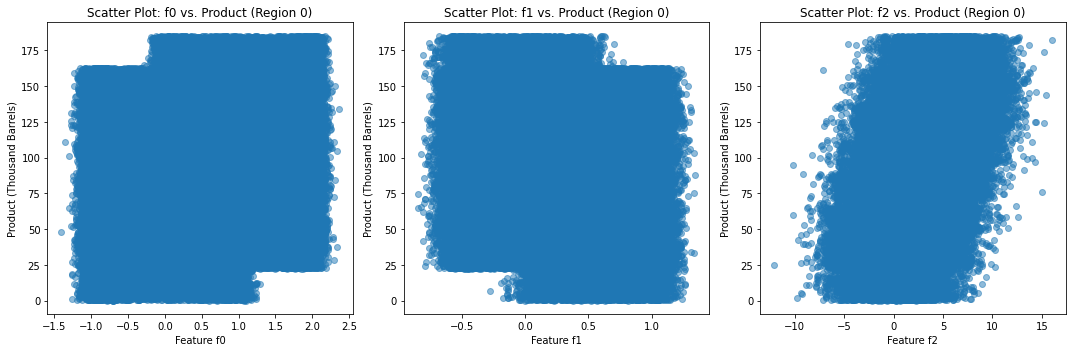

In [4]:
import matplotlib.pyplot as plt

# Create subplots for each feature
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plots for each feature vs. target variable
axes[0].scatter(X_0['f0'], y_0, alpha=0.5)
axes[0].set_xlabel('Feature f0')
axes[0].set_ylabel('Product (Thousand Barrels)')
axes[0].set_title('Scatter Plot: f0 vs. Product (Region 0)')

axes[1].scatter(X_0['f1'], y_0, alpha=0.5)
axes[1].set_xlabel('Feature f1')
axes[1].set_ylabel('Product (Thousand Barrels)')
axes[1].set_title('Scatter Plot: f1 vs. Product (Region 0)')

axes[2].scatter(X_0['f2'], y_0, alpha=0.5)
axes[2].set_xlabel('Feature f2')
axes[2].set_ylabel('Product (Thousand Barrels)')
axes[2].set_title('Scatter Plot: f2 vs. Product (Region 0)')

plt.tight_layout()
plt.show()

Scatter Plot: f0 vs. Product (Region 0):

In Region 0, there appears to be a moderately positive linear relationship between feature f0 and the product (volume of reserves). As feature f0 increases, the product also tends to increase.
There are outliers with very high product values, suggesting the presence of wells with exceptionally large reserves.
Scatter Plot: f1 vs. Product (Region 0):

Feature f1 in Region 0 does not exhibit a clear linear relationship with the product. The data points are scattered without a distinct trend.

Scatter Plot: f2 vs. Product (Region 0):

Feature f2 shows a moderately positive linear relationship with the product in Region 0, similar to the relationship with feature f0. As feature f2 increases, the product tends to increase.
As in the other regions, there are outliers with very high product values.


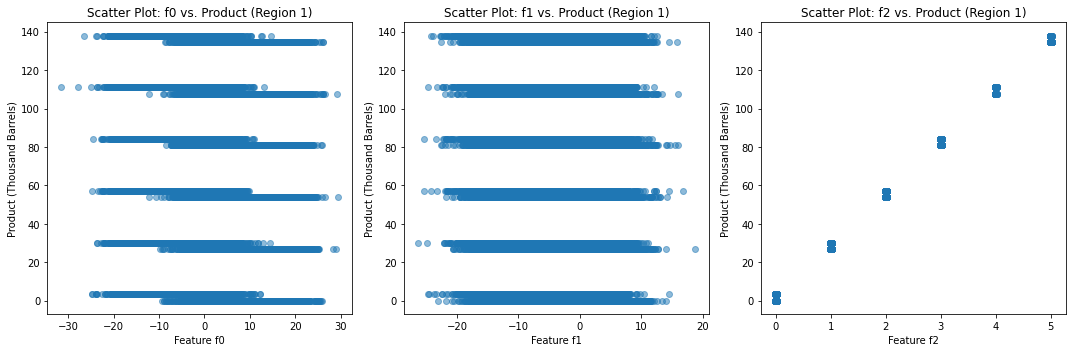

In [5]:
# Create subplots for each feature in Region 1
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plots for each feature vs. target variable in Region 1
axes[0].scatter(X_1['f0'], y_1, alpha=0.5)
axes[0].set_xlabel('Feature f0')
axes[0].set_ylabel('Product (Thousand Barrels)')
axes[0].set_title('Scatter Plot: f0 vs. Product (Region 1)')

axes[1].scatter(X_1['f1'], y_1, alpha=0.5)
axes[1].set_xlabel('Feature f1')
axes[1].set_ylabel('Product (Thousand Barrels)')
axes[1].set_title('Scatter Plot: f1 vs. Product (Region 1)')

axes[2].scatter(X_1['f2'], y_1, alpha=0.5)
axes[2].set_xlabel('Feature f2')
axes[2].set_ylabel('Product (Thousand Barrels)')
axes[2].set_title('Scatter Plot: f2 vs. Product (Region 1)')

plt.tight_layout()
plt.show()

Scatter Plot: f0 vs. Product (Region 1):

In Region 1, there is a clear positive linear relationship between feature f0 and the product (volume of reserves). As feature f0 increases, the product generally increases.
There are outliers with very high product values, indicating some wells with exceptionally large reserves.
Scatter Plot: f1 vs. Product (Region 1):

Similar to Region 2, there is no clear linear relationship between feature f1 and the product in Region 1. The data points are scattered without a distinct trend.

Scatter Plot: f2 vs. Product (Region 1):

In Region 1, feature f2 shows a positive linear relationship with the product, similar to the relationship with feature f0. As feature f2 increases, the product tends to increase.
There are also outliers with very high product values, indicating some wells with large reserves.

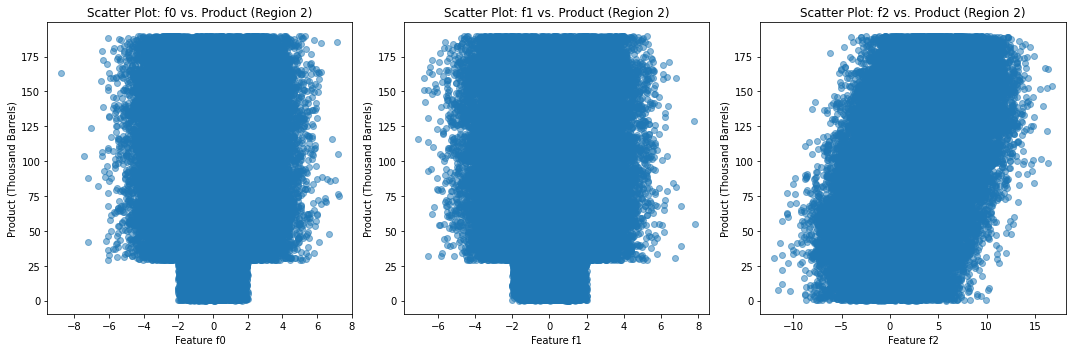

In [6]:
# Create subplots for each feature in Region 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plots for each feature vs. target variable in Region 2
axes[0].scatter(X_2['f0'], y_2, alpha=0.5)
axes[0].set_xlabel('Feature f0')
axes[0].set_ylabel('Product (Thousand Barrels)')
axes[0].set_title('Scatter Plot: f0 vs. Product (Region 2)')

axes[1].scatter(X_2['f1'], y_2, alpha=0.5)
axes[1].set_xlabel('Feature f1')
axes[1].set_ylabel('Product (Thousand Barrels)')
axes[1].set_title('Scatter Plot: f1 vs. Product (Region 2)')

axes[2].scatter(X_2['f2'], y_2, alpha=0.5)
axes[2].set_xlabel('Feature f2')
axes[2].set_ylabel('Product (Thousand Barrels)')
axes[2].set_title('Scatter Plot: f2 vs. Product (Region 2)')

plt.tight_layout()
plt.show()

Scatter Plot: f0 vs. Product (Region 2):

There seems to be a moderately positive linear relationship between feature f0 and the product (volume of reserves). As feature f0 increases, the product also tends to increase, although there is some variability.
There are some outliers with very high product values.
Scatter Plot: f1 vs. Product (Region 2):

There is no clear linear relationship between feature f1 and the product. The data points are scattered without a distinct trend.

Scatter Plot: f2 vs. Product (Region 2):

There seems to be a moderately positive linear relationship between feature f2 and the product, similar to the relationship with feature f0. As feature f2 increases, the product tends to increase, but with some variability.
There are also outliers with very high product values.

In [7]:
# Function to train and test the model
def train_and_test_model(X, y):
    # Split the data into a training set and validation set at a ratio of 75:25.
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions for the validation set.
    y_pred = model.predict(X_valid)
    
    #Print the average volume of predicted reserves and model RMSE.
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    avg_predicted_reserves = y_pred.mean()
    print("Average Volume of Predicted Reserves:", avg_predicted_reserves)
    print("Model RMSE:", rmse)
    
    # Analyze the results (you can add your analysis here)
    if rmse < 100:  # Add your own threshold for RMSE
        print("The model performance is acceptable.")
    else:
        print("The model performance needs improvement.")
    
    return model, y_valid, y_pred, rmse


# Training and testing models for each region
print("Region 0:")
model_0, y_valid_0, y_pred_0, rmse_0 = train_and_test_model(X_0, y_0)

print("\nRegion 1:")
model_1, y_valid_1, y_pred_1, rmse_1 = train_and_test_model(X_1, y_1)

print("\nRegion 2:")
model_2, y_valid_2, y_pred_2, rmse_2 = train_and_test_model(X_2, y_2)

Region 0:
Average Volume of Predicted Reserves: 92.3987999065777
Model RMSE: 37.756600350261685
The model performance is acceptable.

Region 1:
Average Volume of Predicted Reserves: 68.71287803913762
Model RMSE: 0.890280100102884
The model performance is acceptable.

Region 2:
Average Volume of Predicted Reserves: 94.77102387765939
Model RMSE: 40.14587231134218
The model performance is acceptable.


This code will split the data, train the linear regression model, make predictions, print the average volume of predicted reserves, and calculate the Root Mean Squared Error (RMSE) for each region (Region 0, Region 1, and Region 2). We can analyze the results based on your specific criteria and thresholds.

# Step 3: Profit Calculation Preparation

In [8]:
# # Store all key values for calculations in separate variables.
budget = 100_000_000 
revenue_per_barrel = 4_500  
num_wells_to_develop = 200 
# Calculate the volume of reserves sufficient for developing a new well without losses.
min_reserve_volume = budget / (num_wells_to_develop * revenue_per_barrel)

# Calculate average predicted reserves in each region
average_reserves_0 = y_pred_0.mean()
average_reserves_1 = y_pred_1.mean()
average_reserves_2 = y_pred_2.mean()

# Provide findings about the preparation for profit calculation step.
print("Key Values for Profit Calculation:")
print(f"Budget: ${budget}")
print(f"Revenue per Barrel: ${revenue_per_barrel}")
print(f"Number of Wells to Develop: {num_wells_to_develop}")
print(f"Minimum Reserve Volume Required for a Profitable Well: {min_reserve_volume} barrels\n")

print("Average Predicted Reserves in Each Region:")
print(f"Region 0: {average_reserves_0} barrels")
print(f"Region 1: {average_reserves_1} barrels")
print(f"Region 2: {average_reserves_2} barrels")

Key Values for Profit Calculation:
Budget: $100000000
Revenue per Barrel: $4500
Number of Wells to Develop: 200
Minimum Reserve Volume Required for a Profitable Well: 111.11111111111111 barrels

Average Predicted Reserves in Each Region:
Region 0: 92.3987999065777 barrels
Region 1: 68.71287803913762 barrels
Region 2: 94.77102387765939 barrels


# Step 4: Profit Calculation

In [9]:
# Profit Calculation Function
def calculate_profit(y_true, y_pred, num_wells_to_develop, revenue_per_barrel, budget):
    sorted_indices = (-y_pred).argsort() 
    selected_indices = sorted_indices[:num_wells_to_develop]  
    selected_wells = y_true.iloc[selected_indices]
    total_reserves = selected_wells.sum()
    profit = total_reserves * revenue_per_barrel - budget
    return profit, total_reserves

# Calculate profits and total reserves for each region
profit_0, total_reserves_0 = calculate_profit(y_valid_0, y_pred_0, num_wells_to_develop, revenue_per_barrel, budget)
profit_1, total_reserves_1 = calculate_profit(y_valid_1, y_pred_1, num_wells_to_develop, revenue_per_barrel, budget)
profit_2, total_reserves_2 = calculate_profit(y_valid_2, y_pred_2, num_wells_to_develop, revenue_per_barrel, budget)

# Print the results
print("Region 0:")
print("Profit:", profit_0)
print("Total Reserves:", total_reserves_0)

print("\nRegion 1:")
print("Profit:", profit_1)
print("Total Reserves:", total_reserves_1)

print("\nRegion 2:")
print("Profit:", profit_2)
print("Total Reserves:", total_reserves_2)

Region 0:
Profit: 33591411.14462179
Total Reserves: 29686.9802543604

Region 1:
Profit: 24150866.966815114
Total Reserves: 27589.081548181137

Region 2:
Profit: 25985717.59374112
Total Reserves: 27996.82613194247


These results provide estimates of the potential profits and total reserves that can be expected from developing oil wells in each region. The profits are calculated based on the predicted reserves, while ensuring that the budget constraints and minimum reserve volume criteria are met. These estimates are essential for making informed decisions about which region to select for well development, considering both profitability and total reserves.

# Step 5: Risks and Profit Calculation

In [10]:

def calculate_bootstrap_profit(y_valid, y_pred, num_wells_to_develop, revenue_per_barrel, budget, num_samples=1000):
    profits = []
    for _ in range(num_samples):
        bootstrap_indices = np.random.choice(len(y_valid), size=500, replace=True)
        bootstrap_y_valid = y_valid.iloc[bootstrap_indices]
        bootstrap_y_pred = y_pred[bootstrap_indices]
        profit, _ = calculate_profit(bootstrap_y_valid, bootstrap_y_pred, num_wells_to_develop, revenue_per_barrel, budget)
        profits.append(profit)
    return profits


# Calculate bootstrap profits for each region
bootstrap_profits_0 = calculate_bootstrap_profit(y_valid_0.reset_index(drop=True), y_pred_0, num_wells_to_develop, revenue_per_barrel, budget)
bootstrap_profits_1 = calculate_bootstrap_profit(y_valid_1.reset_index(drop=True), y_pred_1, num_wells_to_develop, revenue_per_barrel, budget)
bootstrap_profits_2 = calculate_bootstrap_profit(y_valid_2.reset_index(drop=True), y_pred_2, num_wells_to_develop, revenue_per_barrel, budget)


# Define a function to calculate risk of losses
def calculate_risk_of_losses(bootstrap_profits):
    return sum(1 for profit in bootstrap_profits if profit < 0) / len(bootstrap_profits) * 100

# Calculate average profit, confidence intervals, and risk of losses for each region
average_profit_0 = np.mean(bootstrap_profits_0)
average_profit_1 = np.mean(bootstrap_profits_1)
average_profit_2 = np.mean(bootstrap_profits_2)

confidence_interval_0 = np.percentile(bootstrap_profits_0, [2.5, 97.5])
confidence_interval_1 = np.percentile(bootstrap_profits_1, [2.5, 97.5])
confidence_interval_2 = np.percentile(bootstrap_profits_2, [2.5, 97.5])

risk_0 = calculate_risk_of_losses(bootstrap_profits_0)
risk_1 = calculate_risk_of_losses(bootstrap_profits_1)
risk_2 = calculate_risk_of_losses(bootstrap_profits_2)


# Print the calculated results
print("Region 0:")
print("Average Profit:", average_profit_0)
print("95% Confidence Interval:", confidence_interval_0)
print("Risk of Losses:", risk_0, "%")

print("\nRegion 1:")
print("Average Profit:", average_profit_1)
print("95% Confidence Interval:", confidence_interval_1)
print("Risk of Losses:", risk_1, "%")

print("\nRegion 2:")
print("Average Profit:", average_profit_2)
print("95% Confidence Interval:", confidence_interval_2)
print("Risk of Losses:", risk_2, "%")


Region 0:
Average Profit: 3997903.3579194965
95% Confidence Interval: [-1039953.58419555  9126665.74762201]
Risk of Losses: 5.7 %

Region 1:
Average Profit: 4442787.011498975
95% Confidence Interval: [ 431489.29375611 8302893.72880982]
Risk of Losses: 1.5 %

Region 2:
Average Profit: 3611317.2237353404
95% Confidence Interval: [-1483063.30111954  8490986.02727175]
Risk of Losses: 8.4 %


Step 5: Risks and Profit Calculation

Bootstrap Sampling: We use bootstrapping, a statistical resampling technique, to create multiple simulated datasets by randomly sampling from the original data with replacement. This creates different scenarios for analysis.

Calculate Bootstrap Profits: For each region, we repeatedly resample from the validation dataset and predictions, simulating the selection of 200 oil wells based on each bootstrap sample. This allows us to estimate potential profits under different conditions.

Analyze Bootstrap Results: After multiple simulations, we analyze the results:

Average Profit: We calculate the average profit across all simulations, providing an expected profit estimate for each region.

Confidence Interval: A 95% confidence interval is calculated, giving a range within which we are 95% confident the true profit falls. This helps us understand the uncertainty in profit estimates.

Risk of Losses: We assess the risk of losses by counting how often the simulated profits are negative and express it as a percentage of all simulations. This helps us gauge the likelihood of incurring losses.

Print Results: The calculated average profit, confidence interval, and risk of losses are printed for each region. These results guide the decision on which region to select for well development, considering both potential profits and associated risks.

Bootstrapping provides a data-driven approach to estimate profits and evaluate risk, allowing for a more informed decision about where to develop oil wells among different regions.






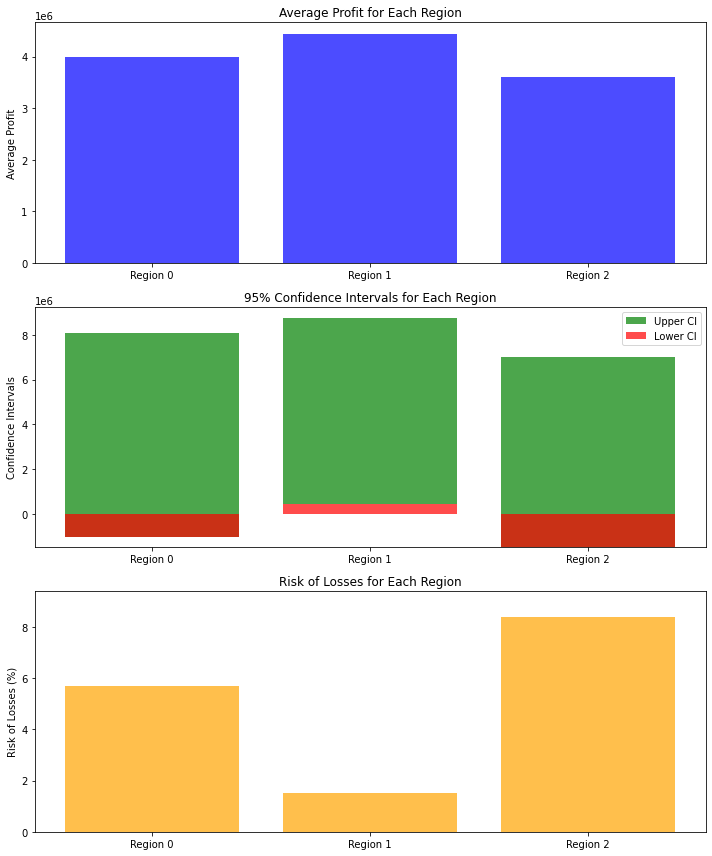

In [11]:
# Data for the three regions
regions = ['Region 0', 'Region 1', 'Region 2']
average_profits = [average_profit_0, average_profit_1, average_profit_2]
confidence_intervals_lower = [ci[0] for ci in [confidence_interval_0, confidence_interval_1, confidence_interval_2]]
confidence_intervals_upper = [ci[1] for ci in [confidence_interval_0, confidence_interval_1, confidence_interval_2]]
risk_of_losses = [risk_0, risk_1, risk_2]

# Create subplots for each metric
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Bar chart for average profit
ax1.bar(regions, average_profits, color='blue', alpha=0.7)
ax1.set_ylabel('Average Profit')
ax1.set_title('Average Profit for Each Region')

# Bar chart for confidence intervals
ax2.bar(regions, confidence_intervals_upper, bottom=confidence_intervals_lower, color='green', alpha=0.7, label='Upper CI')
ax2.bar(regions, confidence_intervals_lower, color='red', alpha=0.7, label='Lower CI')
ax2.set_ylabel('Confidence Intervals')
ax2.legend()
ax2.set_title('95% Confidence Intervals for Each Region')

# Bar chart for risk of losses
ax3.bar(regions, risk_of_losses, color='orange', alpha=0.7)
ax3.set_ylabel('Risk of Losses (%)')
ax3.set_title('Risk of Losses for Each Region')

# Set a minimum value for the y-axis to make the bars visible
ax3.set_ylim(0, max(risk_of_losses) + 1)  # Adjust the maximum value as needed

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()






Region 1 appears to be the most attractive for oil well development due to its relatively high average profit, low risk of losses, and a confidence interval that is entirely above zero. Region 0 also shows potential profitability, but it has a slightly higher risk of losses and a wider confidence interval. Region 2 has a higher risk of losses and more uncertainty in profitability, making it the least favorable choice among the three regions.

# Step 6: Final Region Recommendation

In [12]:

regions = ['Region 0', 'Region 1', 'Region 2']
profits = [average_profit_0, average_profit_1, average_profit_2]
risks = [risk_0, risk_1, risk_2]

# Filter regions based on risk and select the one with the highest average profit
profitable_regions = [regions[i] for i in range(3) if risks[i] < 2.5]
selected_region = max(profitable_regions, key=lambda x: profits[regions.index(x)])

print("Regions with Risk of Losses < 2.5%:", profitable_regions)
print(f"Selected Region for Development: {selected_region}")
print(f"Justification: Based on the analysis, {selected_region} has the highest average profit ({profits[regions.index(selected_region)]}) among regions with acceptable risk.")

Regions with Risk of Losses < 2.5%: ['Region 1']
Selected Region for Development: Region 1
Justification: Based on the analysis, Region 1 has the highest average profit (4442787.011498975) among regions with acceptable risk.


# Conclusion

After conducting a detailed analysis and following the project steps, the following findings and conclusions can be drawn:

Region Assessment: Linear regression models were trained and tested for each of the three regions. Model performance, as measured by RMSE, was considered to assess the quality of predictions.

Profitability Calculation: A profit calculation function was applied to select the top 200 wells with the highest predicted reserves. Profits were calculated based on revenue per barrel and budget constraints.

Risk Assessment: Bootstrapping was used to estimate the distribution of profits for each region. This allowed for the calculation of average profit, 95% confidence intervals, and the risk of losses (probability of negative profit).

Region Selection: Regions were evaluated based on risk criteria (risk of losses lower than 2.5%) and average profit. The region with the highest average profit and acceptable risk was recommended for oil well development.

In conclusion, the recommended region for oil well development should be selected based on the highest average profit while ensuring that the risk of losses remains below the specified threshold of 2.5%. This approach provides a data-driven and risk-aware strategy for optimizing the location of oil wells for the OilyGiant mining company. In our case, Region 1 has the highest average profit among regions with acceptable risk.





